# CMSU Student Survey-Case Study - Probability and it's Distribution:

The Student News Service at Clear Mountain State University (CMSU) has decided to gather data about the undergraduate students that attend CMSU. CMSU creates and distributes a survey of 14 questions and receives responses from 62 undergraduates (stored in the Survey.csv file).<br>

* Attribute Information:

Total 62 Observations and 14 Variables for CMSU student survey case study.

* ID - Student ID Number.
* Gender -Male or Female.
* Age - Age of a student.
* Class - Junior,Senior or sophomore student.
* Major -Accounting; CIS; Economics/Finance; International Business; Management; Retailing/Marketing; Undecided; Other.
* Grad Intention - Boolean Data.
* GPA - Student GPA score.
* Employment - Full-Time; Part-Time; Unemployed
* Salary - Numerical Data.
* Social Networking - Rating
* Satisfaction - Rating
* Spending - 
* Computer -
* Text Messages -

In [1]:
# Import required Libraries/packages/Modules 
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from scipy.stats import shapiro # Shapiro-Wilk test

In C:\Users\srika\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\srika\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\srika\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In C:\Users\srika\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\srika\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mpl

# Import the dataset and Load the dataset.

In [2]:
survey_df = pd.read_csv('Survey-1.csv')

# Exploratory Data Analysis

In [3]:
survey_df.head()

,ID,Gender,Age,Class,Major,Grad Intention,GPA,Employment,Salary,Social Networking,Satisfaction,Spending,Computer,Text Messages
0,1,Female,20,Junior,Other,Yes,2.9,Full-Time,50.0,1,3,350,Laptop,200
1,2,Male,23,Senior,Management,Yes,3.6,Part-Time,25.0,1,4,360,Laptop,50
2,3,Male,21,Junior,Other,Yes,2.5,Part-Time,45.0,2,4,600,Laptop,200
3,4,Male,21,Junior,CIS,Yes,2.5,Full-Time,40.0,4,6,600,Laptop,250
4,5,Male,23,Senior,Other,Undecided,2.8,Unemployed,40.0,2,4,500,Laptop,100


In [4]:
row, col = survey_df.shape
print('There are total {}'.format(row),'rows and {}'.format(col),'columns in the dataset')

There are total 62 rows and 14 columns in the dataset


In [5]:
survey_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ID                 62 non-null     int64  
 1   Gender             62 non-null     object 
 2   Age                62 non-null     int64  
 3   Class              62 non-null     object 
 4   Major              62 non-null     object 
 5   Grad Intention     62 non-null     object 
 6   GPA                62 non-null     float64
 7   Employment         62 non-null     object 
 8   Salary             62 non-null     float64
 9   Social Networking  62 non-null     int64  
 10  Satisfaction       62 non-null     int64  
 11  Spending           62 non-null     int64  
 12  Computer           62 non-null     object 
 13  Text Messages      62 non-null     int64  
dtypes: float64(2), int64(6), object(6)
memory usage: 6.9+ KB


In [6]:
survey_df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
ID,62,NaN,NaN,NaN,31.5,18.0416,1,16.25,31.5,46.75,62
Gender,62,2,Female,33,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,62,NaN,NaN,NaN,21.129,1.43131,18,20,21,22,26
Class,62,3,Senior,31,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Major,62,8,Retailing/Marketing,14,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Grad Intention,62,3,Yes,28,NaN,NaN,NaN,NaN,NaN,NaN,NaN
GPA,62,NaN,NaN,NaN,3.12903,0.377388,2.3,2.9,3.15,3.4,3.9
Employment,62,3,Part-Time,43,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Salary,62,NaN,NaN,NaN,48.5484,12.0809,25,40,50,55,80
Social Networking,62,NaN,NaN,NaN,1.51613,0.844305,0,1,1,2,4


In [7]:
list(survey_df.columns)

['ID',
 'Gender',
 'Age',
 'Class',
 'Major',
 'Grad Intention',
 'GPA',
 'Employment',
 'Salary',
 'Social Networking',
 'Satisfaction',
 'Spending',
 'Computer',
 'Text Messages']

# 2.1	For this data, construct the following contingency tables:

* **2.1.1	Gender and Major**

In [8]:
pd.crosstab(survey_df['Gender'],survey_df['Major'],margins=True)

Major,Accounting,CIS,Economics/Finance,International Business,Management,Other,Retailing/Marketing,Undecided,All
Gender,,,,,,,,,
Female,3,3,7,4,4,3,9,0,33
Male,4,1,4,2,6,4,5,3,29
All,7,4,11,6,10,7,14,3,62


* **2.1.2	Gender and Grad Intention**

In [9]:
pd.crosstab(survey_df['Gender'],survey_df['Grad Intention'],margins=True)

Grad Intention,No,Undecided,Yes,All
Gender,,,,
Female,9,13,11,33
Male,3,9,17,29
All,12,22,28,62


* **2.1.3	Gender and Employment**

In [10]:
pd.crosstab(survey_df['Gender'],survey_df['Employment'],margins=True)

Employment,Full-Time,Part-Time,Unemployed,All
Gender,,,,
Female,3,24,6,33
Male,7,19,3,29
All,10,43,9,62


* **2.1.4	Gender and Computer**

In [11]:
pd.crosstab(survey_df['Gender'],survey_df['Computer'],margins=True)

Computer,Desktop,Laptop,Tablet,All
Gender,,,,
Female,2,29,2,33
Male,3,26,0,29
All,5,55,2,62


# 2.2	Assume that the sample is a representative of the population of CMSU. Based on the data, answer the following questions:

## 2.2.1	What is the probability that a randomly selected CMSU student will be male?<br>What is the probability that a randomly selected CMSU student will be female?


In [12]:
#a : probability that a randomly selected CMSU student will be male
Prob_male = 29/62
print("probability that a randomly selected CMSU student will be male is: {}".format(Prob_male))

#a : probability that a randomly selected CMSU student will be female
Prob_female = 33/62
print("probability that a randomly selected CMSU student will be female is: {}".format(Prob_female))

probability that a randomly selected CMSU student will be male is: 0.46774193548387094
probability that a randomly selected CMSU student will be female is: 0.532258064516129


## 2.2.2	Find the conditional probability of different majors among the male students in CMSU.?<br>Find the conditional probability of different majors among the female students of CMSU.?


* Either by looking into the contingency table of ‘Gender’ and ‘Majors’ or by using Conditional probability formula,We can calculate the conditional probability of different Majors given the probability of Gender:

* **P(A|B) = Probability of Event A given Event B has occured.**
* **P(A and B) = Probability of Event A occured and Event B occured.**
* **P(B) = Probability of Event B**

$$P(A|B) = \frac{P(A \cap B)}{P(B)}$$



In [13]:
# Find the conditional probability of different majors among the male students in CMSU:

ratings_probs = survey_df.groupby('Gender').size().div(len(survey_df))
ratings_probs

Gender
Female    0.532258
Male      0.467742
dtype: float64

In [14]:
survey_df.groupby(['Gender','Major']).size().div(len(survey_df))

Gender  Major                 
Female  Accounting                0.048387
        CIS                       0.048387
        Economics/Finance         0.112903
        International Business    0.064516
        Management                0.064516
        Other                     0.048387
        Retailing/Marketing       0.145161
Male    Accounting                0.064516
        CIS                       0.016129
        Economics/Finance         0.064516
        International Business    0.032258
        Management                0.096774
        Other                     0.064516
        Retailing/Marketing       0.080645
        Undecided                 0.048387
dtype: float64

In [15]:
survey_df.groupby(['Gender','Major']).size().div(len(survey_df)).div(ratings_probs,axis=0, level='Gender')

Gender  Major                 
Female  Accounting                0.090909
        CIS                       0.090909
        Economics/Finance         0.212121
        International Business    0.121212
        Management                0.121212
        Other                     0.090909
        Retailing/Marketing       0.272727
Male    Accounting                0.137931
        CIS                       0.034483
        Economics/Finance         0.137931
        International Business    0.068966
        Management                0.206897
        Other                     0.137931
        Retailing/Marketing       0.172414
        Undecided                 0.103448
dtype: float64

## 2.2.3	Find the conditional probability of intent to graduate, given that the student is a male.?<br>Find the conditional probability of intent to graduate, given that the student is a female.?


In [16]:
survey_df.groupby(['Gender','Grad Intention']).size().div(len(survey_df)).div(ratings_probs,axis=0, level='Gender')

Gender  Grad Intention
Female  No                0.272727
        Undecided         0.393939
        Yes               0.333333
Male    No                0.103448
        Undecided         0.310345
        Yes               0.586207
dtype: float64

## 2.2.4	Find the conditional probability of employment status for the male students as well as for the female students.

In [17]:
survey_df.groupby(['Gender','Employment']).size().div(len(survey_df)).div(ratings_probs,axis=0, level='Gender')

Gender  Employment
Female  Full-Time     0.090909
        Part-Time     0.727273
        Unemployed    0.181818
Male    Full-Time     0.241379
        Part-Time     0.655172
        Unemployed    0.103448
dtype: float64

## 2.2.5	Find the conditional probability of laptop preference among the male students as well as among the female students.

In [18]:
survey_df.groupby(['Gender','Computer']).size().div(len(survey_df)).div(ratings_probs,axis=0, level='Gender')

Gender  Computer
Female  Desktop     0.060606
        Laptop      0.878788
        Tablet      0.060606
Male    Desktop     0.103448
        Laptop      0.896552
dtype: float64

# 2.4	Note that there are three numerical (continuous) variables in the data set, Salary, Spending and Text Messages. For each of them comment whether they follow a normal distribution and Write a note summarizing your conclusions.

C:\Users\srika\AppData\Roaming\Python\Python37\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\srika\AppData\Roaming\Python\Python37\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\srika\AppData\Roaming\Python\Python37\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level functio

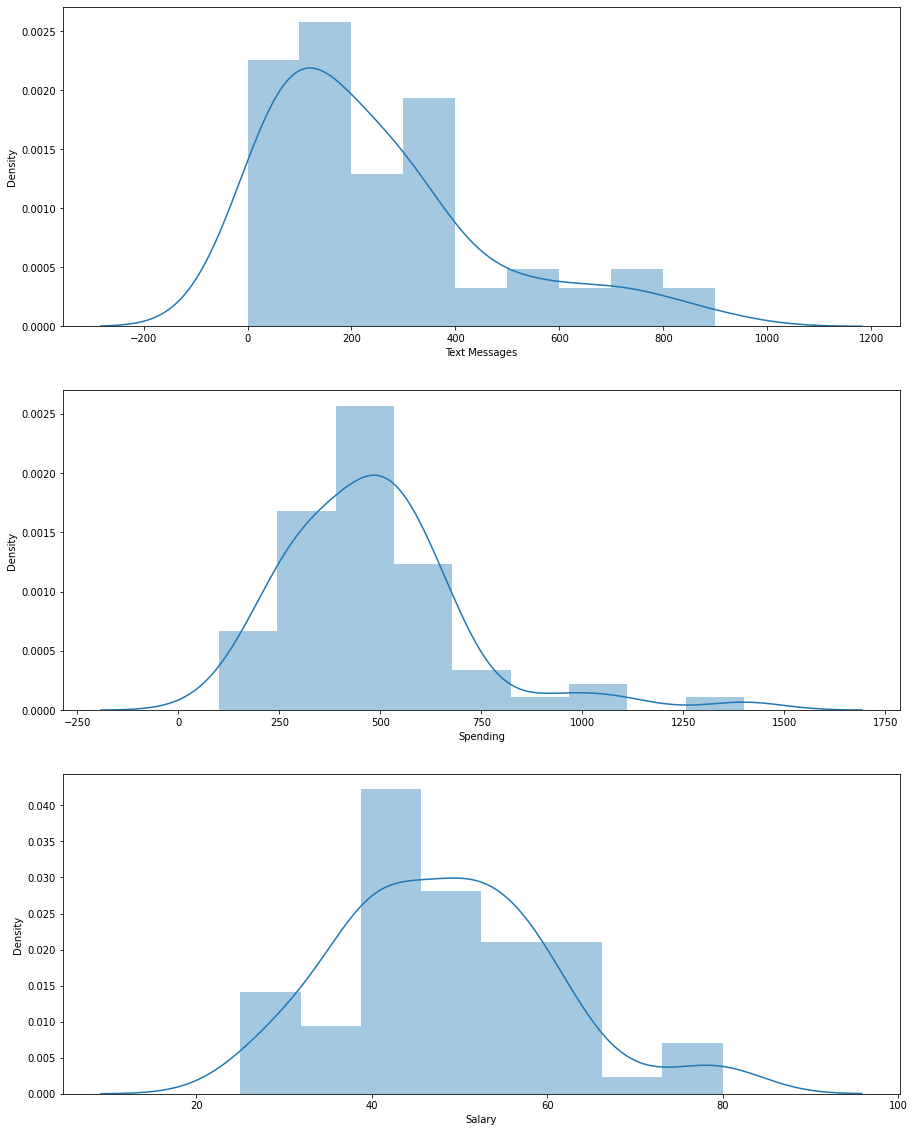

In [19]:
fig, axes = plt.subplots(nrows=3,squeeze=False)
fig.set_size_inches(15, 20)

a = sns.distplot(survey_df['Text Messages'],ax=axes[0][0]);

b = sns.distplot(survey_df['Spending'],ax=axes[1][0]);

c = sns.distplot(survey_df['Salary'],ax=axes[2][0]);

In [20]:
# Normality test
stat, p = shapiro(survey_df['Salary'])
print('Statistics=%.3f, p=%.3f' % (stat,p))
#interpret
alpha = 0.05
if p > alpha:
    print('Sample looks Gaussian (fail to reject H0)')
else:
    print('Sample does not looks Gaussian (reject H0)')

Statistics=0.957, p=0.028
Sample does not looks Gaussian (reject H0)


In [21]:
# Normality test
stat, p = shapiro(survey_df['Spending'])
print('Statistics=%.3f, p=%.3f' % (stat,p))
#interpret
alpha = 0.05
if p > alpha:
    print('Sample looks Gaussian (fail to reject H0)')
else:
    print('Sample does not looks Gaussian (reject H0)')

Statistics=0.878, p=0.000
Sample does not looks Gaussian (reject H0)


In [22]:
# Normality test
stat, p = shapiro(survey_df['Text Messages'])
print('Statistics=%.3f, p=%.3f' % (stat,p))
#interpret
alpha = 0.05
if p > alpha:
    print('Sample looks Gaussian (fail to reject H0)')
else:
    print('Sample does not looks Gaussian (reject H0)')

Statistics=0.859, p=0.000
Sample does not looks Gaussian (reject H0)


## Checking Normality through Empirical Rule

In [23]:
def empirical(x):
    sd = x.std()
    mean = x.mean()
    
    print ('68% data should lie between {} and {}'.format(mean-sd,mean+sd))
    print('{}% data lies between LL and UL for 68%'.format(pd.Series((x> mean-sd) & (x< mean+sd)).value_counts(normalize=True).values[0]*100),'\n')
    
    print ('95% data should lie between {} and {}'.format(mean-(2*sd),mean+(2*sd)))
    print('{}% data lies between LL and UL for 95%'.format(pd.Series((x> mean-(2*sd)) & (x< mean+(2*sd))).value_counts(normalize=True).values[0]*100),'\n')
    
    print ('99% data should lie between {} and {}'.format(mean-(3*sd),mean+(3*sd)))
    print('{}% data lies between LL and UL for 99%'.format(pd.Series((x> mean-(3*sd)) & (x< mean+(3*sd))).value_counts(normalize=True).values[0]*100),'\n')

In [24]:
empirical(survey_df['Salary'])

68% data should lie between 36.46747488043692 and 60.62929931311147
79.03225806451613% data lies between LL and UL for 68% 

95% data should lie between 24.38656266409964 and 72.71021152944874
95.16129032258065% data lies between LL and UL for 95% 

99% data should lie between 12.30565044776236 and 84.79112374578602
100.0% data lies between LL and UL for 99% 



In [25]:
empirical(survey_df['Spending'])

68% data should lie between 260.062324066296 and 703.9699339982201
80.64516129032258% data lies between LL and UL for 68% 

95% data should lie between 38.10851910033398 and 925.9237389641821
95.16129032258065% data lies between LL and UL for 95% 

99% data should lie between -183.84528586562806 and 1147.8775439301442
98.38709677419355% data lies between LL and UL for 99% 



In [26]:
empirical(survey_df['Text Messages'])

68% data should lie between 31.74372711665876 and 460.67562772205093
79.03225806451613% data lies between LL and UL for 68% 

95% data should lie between -182.72222318603733 and 675.141578024747
91.93548387096774% data lies between LL and UL for 95% 

99% data should lie between -397.18817348873336 and 889.6075283274431
98.38709677419355% data lies between LL and UL for 99% 



# Thank You